In [ ]:
from config.config import YOUTUBE_API_KEY #burada config dosyasında ki config.py API anahtarını alıyor.
from googleapiclient.discovery import build #burada googleapiclient kutuphanesinden build fonksiyonunu alarak youtube API servisine bağlanır.
from IPython.display import JSON #JSON cıktısını gostermek API den gelen veriler okunması icin

In [ ]:
api_service_name = "youtube"
api_version = "v3"
#youtube api servisinden hangi versiyonu kullandıgımız 

youtube = build(
    api_service_name, api_version, developerKey=YOUTUBE_API_KEY)
#youtube objesinden veri çekilir

In [ ]:
channelIds = ['UCcR1TUaD8Zn6P6O8hOA-xYA',]#kanal ID 

In [ ]:
request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=",".join(channelIds)
)#kanalla ilgili snippet contentdetails statistics bilgilerini istedigine dair istek
response = request.execute()#gonderip cevabı alıyorsun

print(response)#normal metin formatında gosterilir

{'kind': 'youtube#channelListResponse', 'etag': '1f-kbY9bgS85nCrFl39HvMsZMdE', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': '1pMXgmUY2ay5glM-Zr6_PJQQ51o', 'id': 'UCcR1TUaD8Zn6P6O8hOA-xYA', 'snippet': {'title': 'Shayda Campbell', 'description': "Hi! I'm Shayda, the creator behind Shayda Campbell YouTube. This channel is all about getting creative no matter your skill level. I think we have so much to gain by investing in our lives in a creative and artistic way. So let's paint some watercolor flowers, make a birthday card for a friend and doodle in our journals like we're kids! Creativity is play, anyone can do it! \n\nInterested in a collaboration? Email my team at teamshayda@gmail.com\n\n*note: due to the high volume of emails, we will no longer be responding to questions regarding products/ supplies used in the YouTube videos. Head to my blog for exact product links.\xa0Emails regarding video ideas are always appreciated and take

In [ ]:
JSON(response)#JSON formatında gösterimi

<IPython.core.display.JSON object>

In [ ]:
uploads_playlist_id= response['items'][0]['contentDetails']['relatedPlaylists']['uploads']
#response icindeki yüklenen playlistleri atıyoruz

playlist_request=youtube.playlistItems().list(
    part ="snippet",#dediğin için video başlıkları, açıklamaları, yayın tarihleri gibi temel bilgileri alırsın.
    playlistId = uploads_playlist_id,# ile hangi playlistten video istediğini söylüyorsun (burada uploads listesi).
    maxResults= 50
)
playlist_response = playlist_request.execute()#itsek gerceklesir

In [ ]:
video_titles = []

for item in playlist_response['items']:
    title = item['snippet']['title']
    video_titles.append(title)


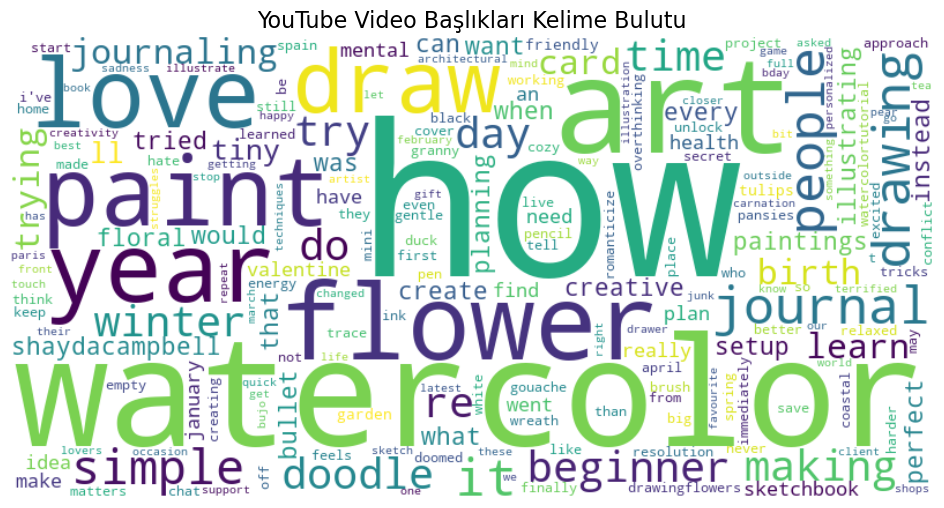

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#  Hepsini birleştir (tek bir büyük metin haline getir)
text = " ".join(video_titles).lower()

# Kelime bulutu oluştur
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords={"and", "the", "this", "but", "short", "a", "my", "your","to","for","i","am","is","are","you","m","in","s","me","of","here","with"},  # Türkçe'de sık geçen ama anlamı az olan kelimeleri çıkar
    collocations=False  # İki kelimelik kalıpları (örneğin "how to") ayırır
).generate(text)

#  Görselleştir
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("YouTube Video Başlıkları Kelime Bulutu", fontsize=16)
plt.show()


In [20]:
videos = []
next_page_token = None

while True:
    playlist_response = youtube.playlistItems().list(
        part="snippet",
        playlistId=uploads_playlist_id,
        maxResults=50,
        pageToken=next_page_token
    ).execute()

    videos += playlist_response['items']

    next_page_token = playlist_response.get('nextPageToken')
    if not next_page_token:
        break


In [21]:
video_infos = []

for i in range(0, len(videos), 50):
    video_ids = [v['snippet']['resourceId']['videoId'] for v in videos[i:i + 50]]

    stats_response = youtube.videos().list(
        part="snippet,statistics",
        id=",".join(video_ids)
    ).execute()

    for item in stats_response['items']:
        title = item['snippet']['title']
        view_count = int(item['statistics'].get('viewCount', 0))
        video_id = item['id']
        video_infos.append((title, view_count, f"https://www.youtube.com/watch?v={video_id}"))


In [22]:
# Görünüme göre sırala ve ilk 5'ini al
top_videos = sorted(video_infos, key=lambda x: x[1], reverse=True)[:5]

for i, (title, views, url) in enumerate(top_videos, 1):
    print(f"{i}. {title} ({views} görüntüleme)\n   {url}")


1. Every Watercolor Flower You'll Ever Need! (6034842 görüntüleme)
   https://www.youtube.com/watch?v=D3egTjIdbfE
2. Twelve Easy Flower Doodles You Need To Know (3184112 görüntüleme)
   https://www.youtube.com/watch?v=FaUFYpwoPe0
3. 50 Cute Doodle Ideas for When You're Bored at School | Easy Beginner Doodles (3137726 görüntüleme)
   https://www.youtube.com/watch?v=EGLXOVhxLco
4. Every Watercolor Leaf You'll Ever Need!  w/ Genuine Crafts (1692070 görüntüleme)
   https://www.youtube.com/watch?v=MnGhlse5yK0
5. How To use Wax Seal Stamps (1662906 görüntüleme)
   https://www.youtube.com/watch?v=BkBPLOqa4EA


In [23]:
import pandas as pd
# video_infos: (title, view_count, video_url) şeklinde üçlü tuple listesi

df = pd.DataFrame(video_infos, columns=["Başlık", "İzlenme Sayısı", "URL"])

# İzlenme sayısına göre büyükten küçüğe sırala ve ilk 5 videoyu al
top5_df = df.sort_values(by="İzlenme Sayısı", ascending=False).head(5)

# Sonuçları göster
print(top5_df)



                                                Başlık  İzlenme Sayısı  \
724          Every Watercolor Flower You'll Ever Need!         6034842   
709        Twelve Easy Flower Doodles You Need To Know         3184112   
529  50 Cute Doodle Ideas for When You're Bored at ...         3137726   
738  Every Watercolor Leaf You'll Ever Need!  w/ Ge...         1692070   
891                         How To use Wax Seal Stamps         1662906   

                                             URL  
724  https://www.youtube.com/watch?v=D3egTjIdbfE  
709  https://www.youtube.com/watch?v=FaUFYpwoPe0  
529  https://www.youtube.com/watch?v=EGLXOVhxLco  
738  https://www.youtube.com/watch?v=MnGhlse5yK0  
891  https://www.youtube.com/watch?v=BkBPLOqa4EA  


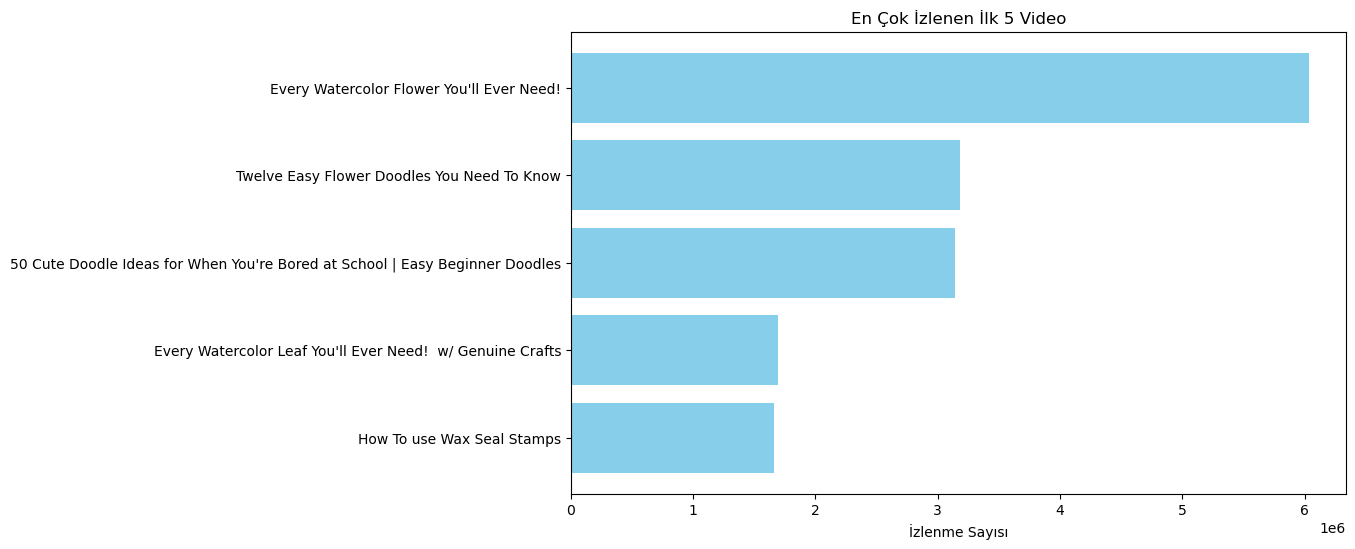

In [24]:
import matplotlib.pyplot as plt

# Diyelim ki top5_df DataFrame'in var, "Başlık" ve "İzlenme Sayısı" sütunlarıyla
plt.figure(figsize=(10,6))
plt.barh(top5_df['Başlık'], top5_df['İzlenme Sayısı'], color='skyblue')
plt.xlabel('İzlenme Sayısı')
plt.title('En Çok İzlenen İlk 5 Video')
plt.gca().invert_yaxis()  # En çok izlenen yukarıda olacak şekilde sıralama
plt.show()
